In [2]:
!unzip data

Archive:  data.zip
replace data/characteristics_prepped.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [3]:
!pip install pgmpy

In [38]:
import pandas as pd
from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import MmhcEstimator
from pgmpy.estimators import K2Score

In [39]:
import networkx as nx

In [5]:
characteristics_df = pd.read_csv('data/characteristics_prepped.csv', encoding='latin1')
places_df = pd.read_csv('data/places_prepped.csv', encoding='latin1')
users_df = pd.read_csv('data/users_prepped.csv', encoding='latin1')
vehicles_df = pd.read_csv('data/vehicles_prepped.csv', encoding='latin1')

## Vehicles + users merge

Vechicles and users table might contain multiple rows for the same Num_Acc id. (Because there might be multiple people or vehicles involved in the accident)

In [6]:
vehicles_df.shape

(1433389, 8)

In [7]:
users_df.shape

(1876005, 13)

In [8]:
vehicles_users_df = pd.merge(vehicles_df, users_df, on='Num_Acc', how='outer', suffixes=('_vehicles', '_users'))

Filter rows that that contains a user-vehicle pair that does not match.

In [9]:
vehicles_users_df = vehicles_users_df[vehicles_users_df['num_veh_vehicles'] == vehicles_users_df['num_veh_users']]

In [10]:
vehicles_users_df.head()

,Num_Acc,Occupants,Mobile Obstacle,Shock,num_veh_vehicles,Vehicle_Category,Fix_obstacle_type,Maneuver_category,Seat,User type,Severity,Sex,Trip,Pedestrian location,Pedestrian action,Pedestrian alone,num_veh_users,Age_range,Safety equipment existence,Safety equipment use
0,201600000001,1,0.0,1.0,B02,8,0,1,1,1,1,2,0,0,0,0,B02,3,1,1
3,201600000001,1,0.0,7.0,A01,2,0,4,1,1,3,1,9,0,0,0,A01,1,2,1
4,201600000002,1,0.0,1.0,A01,8,1,1,1,1,3,1,5,0,0,0,A01,4,1,1
5,201600000002,1,0.0,1.0,A01,8,1,1,2,2,3,1,0,0,0,0,A01,1,1,1
6,201600000002,1,0.0,1.0,A01,8,1,1,3,2,3,2,0,0,0,0,A01,4,1,1


In [11]:
vehicles_users_df['num_veh_vehicles'].isna().sum()

0

In [12]:
vehicles_users_df['num_veh_users'].isna().sum()

0

In [13]:
vehicles_users_df.drop(['num_veh_users', 'num_veh_vehicles'], axis=1, inplace=True)

In [14]:
vehicles_users_df.shape

(1875983, 18)

There are no vehicles without users and no users without vehicles.

## Characteristics + places merge

In [15]:
places_df.shape

(839985, 11)

In [16]:
characteristics_df.shape

(839985, 11)

In [17]:
characteristics_places_df = pd.merge(places_df, characteristics_df, on='Num_Acc', how='inner')

In [18]:
characteristics_places_df.shape

(839985, 21)

## Merge all

In [19]:
merged_df = pd.merge(characteristics_places_df, vehicles_users_df, on='Num_Acc', how='inner')

In [20]:
del merged_df["Date"]

In [21]:
merged_df.shape

(1875983, 37)

In [20]:
merged_df.head()

,Num_Acc,road_type,traffic_type,num_lanes,bike_lane_type,terrain_type,curve_type,condition,infrastructure,situ,...,User type,Severity,Sex,Trip,Pedestrian location,Pedestrian action,Pedestrian alone,Age_range,Safety equipment existence,Safety equipment use
0,201600000001,3.0,2.0,0.0,0.0,1.0,3.0,1.0,0.0,1.0,...,1,1,2,0,0,0,0,3,1,1
1,201600000001,3.0,2.0,0.0,0.0,1.0,3.0,1.0,0.0,1.0,...,1,3,1,9,0,0,0,1,2,1
2,201600000002,3.0,1.0,0.0,0.0,1.0,2.0,1.0,0.0,1.0,...,1,3,1,5,0,0,0,4,1,1
3,201600000002,3.0,1.0,0.0,0.0,1.0,2.0,1.0,0.0,1.0,...,2,3,1,0,0,0,0,1,1,1
4,201600000002,3.0,1.0,0.0,0.0,1.0,2.0,1.0,0.0,1.0,...,2,3,2,0,0,0,0,4,1,1


In [22]:
merged_df = merged_df.apply(pd.to_numeric, downcast="integer")

In [28]:
merged_df.columns

Index(['Num_Acc', 'road_type', 'traffic_type', 'num_lanes', 'bike_lane_type',
       'terrain_type', 'curve_type', 'condition', 'infrastructure', 'situ',
       'school', 'Lighting', 'Localisation', 'Intersection',
       'Atmospheric conditions', 'Collision type', 'Municipality',
       'Department', 'Holiday', 'Time_of_day', 'Occupants', 'Mobile Obstacle',
       'Shock', 'Vehicle_Category', 'Fix_obstacle_type', 'Maneuver_category',
       'Seat', 'User type', 'Severity', 'Sex', 'Trip', 'Pedestrian location',
       'Pedestrian action', 'Pedestrian alone', 'Age_range',
       'Safety equipment existence', 'Safety equipment use'],
      dtype='object')

In [30]:
merged_df.drop('Num_Acc', axis=1, inplace=True)
merged_df.drop('Municipality', axis=1, inplace=True)

In [31]:
merged_df.head()

,road_type,traffic_type,num_lanes,bike_lane_type,terrain_type,curve_type,condition,infrastructure,situ,school,...,User type,Severity,Sex,Trip,Pedestrian location,Pedestrian action,Pedestrian alone,Age_range,Safety equipment existence,Safety equipment use
0,3,2,0,0,1,3,1,0,1,0,...,1,1,2,0,0,0,0,3,1,1
1,3,2,0,0,1,3,1,0,1,0,...,1,3,1,9,0,0,0,1,2,1
2,3,1,0,0,1,2,1,0,1,0,...,1,3,1,5,0,0,0,4,1,1
3,3,1,0,0,1,2,1,0,1,0,...,2,3,1,0,0,0,0,1,1,1
4,3,1,0,0,1,2,1,0,1,0,...,2,3,2,0,0,0,0,4,1,1


In [37]:
scoring_method = K2Score(data=merged_df)
est = HillClimbSearch(data=merged_df, use_cache=True)
estimated_model = est.estimate(
    scoring_method=scoring_method, max_indegree=4, max_iter=10
)

  0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
mmest = MmhcEstimator(data=merged_df)
model = mmest.estimate(scoring_method=scoring_method)

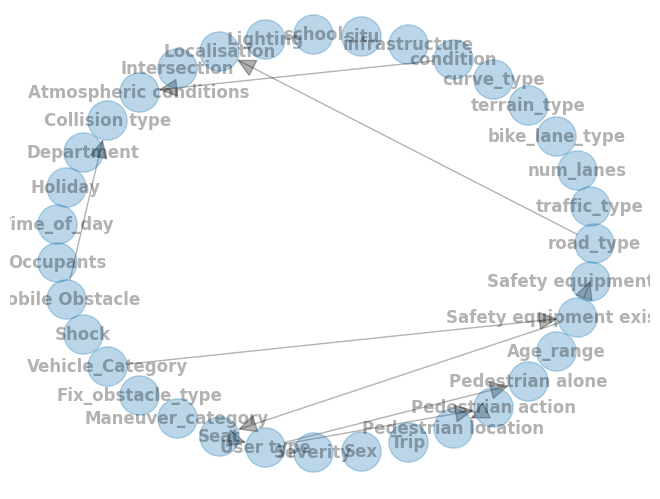

In [49]:
nx.draw_circular(
    estimated_model, with_labels=True, arrowsize=30, node_size=800, alpha=0.3, font_weight="bold"
)

StopIteration: 

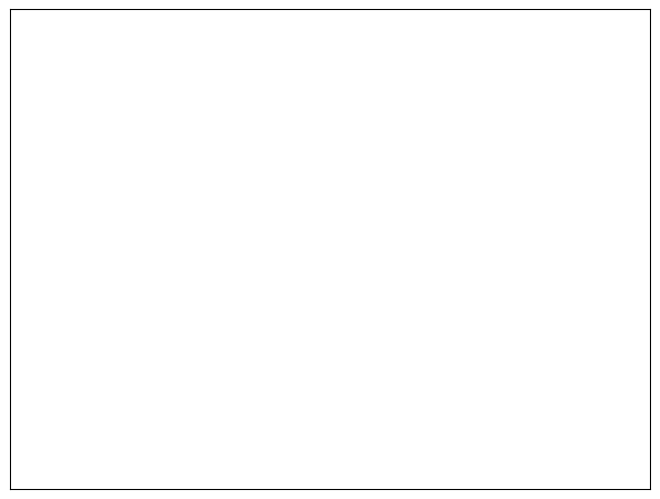

In [51]:
nx.draw(
    estimated_model, with_labels=True, arrowsize=30, node_size=800, alpha=0.3, font_weight="bold"
)